In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 
import pandas as pd
import random

In [2]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [3]:
G=nx.read_edgelist('../data/raw/ca-netscience.txt', nodetype=int)
pos=nx.spring_layout(G,iterations=30)

In [11]:
dt1 = pd.read_csv('../data/raw/targets1.csv') 
dt1.head()

,target
0,291
1,100
2,167
3,168
4,169


In [12]:
targets=list(dt1['target'])

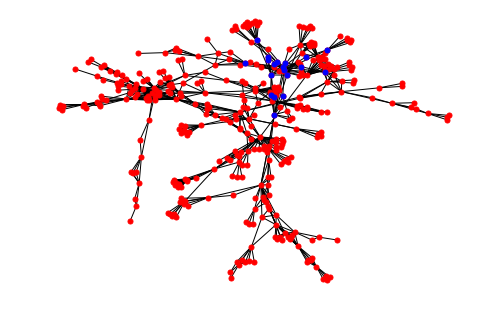

In [13]:
pos=nx.spring_layout(G,iterations=50)
nx.draw(G,pos,node_size=25,with_labels=False)
nx.draw_networkx_nodes(G,pos,
                       nodelist=targets,
                       node_color='b',node_size=25)

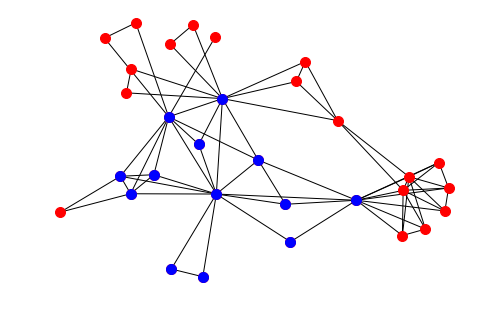

In [7]:
neighbors=[]
for node in targets: 
    neighbors=neighbors+list(G[node])
sG=G.subgraph(neighbors+targets)

pos=nx.spring_layout(sG,iterations=50)
nx.draw(sG,pos,node_size=100,with_labels=False)
nx.draw_networkx_nodes(sG,pos,
                       nodelist=targets,
                       node_color='b',node_size=100)

#plt.savefig('fig2.png')

In [8]:
dt2=pd.read_csv('../data/raw/spreading5.csv') 
dt2.head()

,node,spreading ability
0,2,0.000231
1,1,0.001346
2,3,0.000269
3,4,0.003231
4,5,0.010500


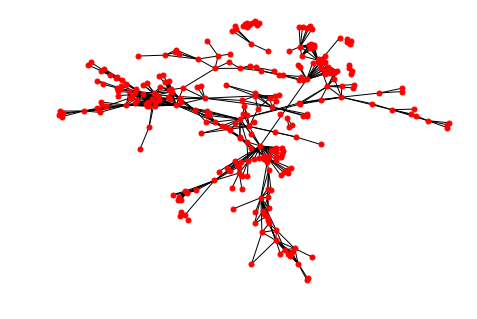

In [156]:
subG = G.subgraph(set(dt2.node).difference(dt1.target))
nx.draw(subG,pos,node_size=25,with_labels=False)

Text(0, 0.5, 'log(s)')

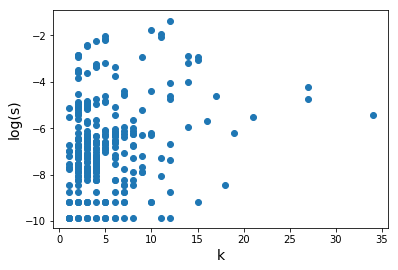

In [28]:
nodes=list(np.array(dt2['node']))
G.degree(nodes)
degrees=np.array([d for node, d in G.degree(nodes)])
s=np.array(dt2['spreading ability'])
plt.scatter(degrees,np.log(s))
plt.xlabel('k',fontsize=14)
plt.ylabel(r'log(s)',fontsize=14)

In [64]:
pred = degrees/np.exp(np.array([k for n, k in nx.clustering().items()]))

In [78]:
subG = G.subgraph(nodes)
subG = subG.subgraph(list(set(nodes).difference(list(nx.isolates(subG)))))

In [102]:
def randomization(G0,steps):
    G=G0.copy()
    L=list(G.edges())
    edges=G.number_of_edges()-1
    st=0
    while(st<steps):
        e1,e2=random.randint(0, edges),random.randint(0, edges)     
        (P,Q)=L[e1]
        (R,S)=L[e2]
        if ((P!=R) and (Q!=S) and(not G.has_edge(P,R)) and(not G.has_edge(Q,S))):
            G.remove_edge(R,S)
            G.remove_edge(P,Q)
            G.add_edge(P,R)
            G.add_edge(Q,S)
            L[e1]=(P,R)
            L[e2]=(Q,S)
            st=st+1
    return(G)

In [124]:
pred = np.array(list(nx.betweenness_centrality(G.subgraph(nodes)).values()))*\
       np.array(list(nx.pagerank(G.subgraph(nodes)).values()))

In [205]:
shortest_paths = list(nx.shortest_path_length(G.subgraph(nodes)))
pred = np.exp(np.array([np.mean([p for n, p in sp[-1].items()]) for sp in shortest_paths]))

In [206]:
print(pearsonr(pred, s))
print(spearmanr(pred, s))
print(kendalltau(pred, s))

(-0.016976205700835353, 0.7677795336815281)
SpearmanrResult(correlation=0.6092043947423029, pvalue=2.2682476887499288e-32)
KendalltauResult(correlation=0.42604355528583066, pvalue=4.958132060734507e-28)
